In [8]:
import numpy as np

In [9]:
!pip install tensorflow

In [10]:
!pip install keras

In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
(X_train, Y_train) , (X_test, Y_test)=mnist.load_data()


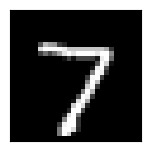

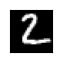

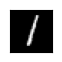

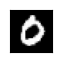

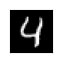

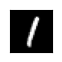

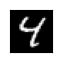

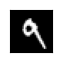

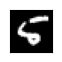

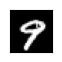

In [12]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range (n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.show()
  plt.close()

In [13]:
#Flattening Image
print("Previous X_train shape: {} \nPrevious Y_train shape: {}".format(X_train.shape, Y_train.shape))
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
#Min MAX Scaling
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")
X_train /=255
X_test /=255
#Processing Target Variable
classes=10
#One hot encoding
Y_train=to_categorical(Y_train,classes)
Y_test=to_categorical(Y_test,classes)
print("New X_train shape:{} \nNew Y_train shape:{}".format(X_train.shape,Y_train.shape))

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape: (60000,)
New X_train shape:(60000, 784) 
New Y_train shape:(60000, 10)


# Setting up Hyper Parameters

In [3]:
input_size =784
batch_size=200
hidden1=400
hidden2=20
classes=10
epochs=10

# Building the FCN Model

```
# This is formatted as code
```

 Model

In [30]:
model= Sequential()
model.add(Dense(hidden1, input_dim=input_size, activation="relu"))
model.add(Dense(hidden2, activation="relu"))
model.add(Dense(classes, activation="softmax"))
#compilation
model.compile(loss="categorical_crossentropy",metrics = ['accuracy'],optimizer='sgd')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 20)                  │           8,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,230 (1.23 MB)

 Trainable params: 322,230 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [31]:
from time import time
#record current time to measure training time
tic=time()
#fit the model on training data
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)
#Record the time after training
toc=time()
# Calculate and print time taken for model training
print("Model training took {} secs". format(toc-tic))
#Testing the traing model


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.3451 - loss: 1.9815
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8008 - loss: 0.8663
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8604 - loss: 0.5548
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8812 - loss: 0.4542
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8948 - loss: 0.3937
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9037 - loss: 0.3574
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9088 - loss: 0.3337
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9152 - loss: 0.3122
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9193 - loss: 0.2963
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9226 - loss: 0.2783
Model training took 80.44019746780396 secs


In [32]:
from sklearn.metrics import accuracy_score
import matplotlib as plt
import numpy as np
y_predict_probs=model.predict(X_test, verbose=0)
y_predict=np.where(y_predict_probs > 0.5, 1,0)
test_accuracy=accuracy_score(Y_test, y_predict)
print("\nTest Accuracy: {}".format(test_accuracy))


Test Accuracy: 0.9074


In [34]:
mask =(20,50)
X_valid=X_test[0:20]
actual_label=Y_test[0:20]
Y_predict_probs_valid= model.predict(X_valid)
Y_predict_valid=np.where(Y_predict_probs_valid>0.5,1,0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


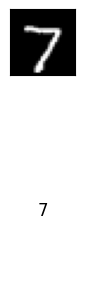

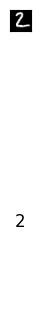

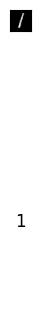

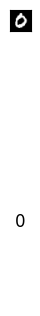

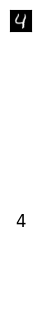

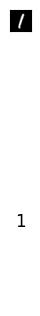

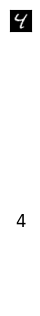

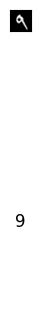

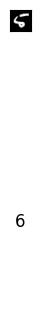

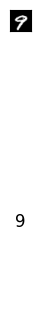

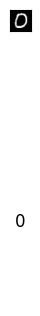

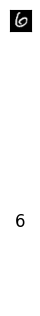

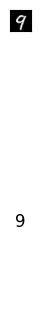

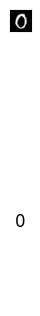

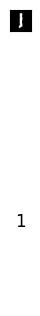

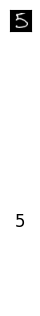

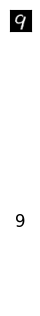

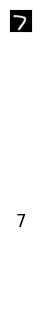

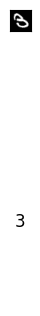

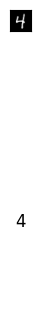

In [39]:
# setup a figure to display
import matplotlib.pyplot as plt
n = len(X_valid)
plt.figure(figsize=(20,4))

for i in range(n):
 ax=plt.subplot(2,n,i+1)
 plt.imshow(X_valid[i].reshape(28,28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 #Display the predict digit
 predicted_digit=np.argmax(Y_predict_probs_valid[i])
 ax=plt.subplot(2,n,i+1+n)
 plt.text(0.5,0.5,str(predicted_digit),fontsize=12,ha='center',va='center')
 plt.axis('off')
 plt.show()
 plt.close()

